В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df = pd.read_csv("cars.csv")
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
# Перевірка кількості категоріальних змінних
print("Кількість категоріальних змінних: ", len(df.select_dtypes(include = "object").columns))

df.select_dtypes(include = "object").columns

Кількість категоріальних змінних:  5


Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

In [5]:
# Перевірка кількості числових змінних
print("Кількість числових змінних: ", len(df.select_dtypes(include = "number").columns))

df.select_dtypes(include = "number").columns

Кількість числових змінних:  8


Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

Бачимо, що `Car_ID` має числовий формат, а це є не логічно і не оптимально з точки зору розміру даних.
Змінимо тип даних в колонці на `str`

In [6]:
df['Car_ID'] = df['Car_ID'].astype("str")

In [7]:
# аналізуємо кіл-ть унікальних значень в категоріальних даних
df.select_dtypes(include = "object").nunique()

Car_ID          100
Brand            11
Model            58
Fuel_Type         2
Transmission      2
Owner_Type        3
dtype: int64

**Висновок:**

Набір даних містить 13 колонок (ми не маємо відсутніх значень):
- 7 є числовими даними
- 6 є категоріальними:

  -  1 технічна (Car_ID, яку ми перевели з числової для оптимізації розміру)
  -  2 бінарні (мають лише 2 значення)
  - 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
  - 1 колонка, в якій можна встановити відношення порядку (наприклад, Small<Medium<Large)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [8]:
# формуємо базові дані
X = df.drop(df.columns[[12]], axis = 1)
y = df['Price']

In [9]:
# для виконання додаткової задачі по категоризації, оновлюємо базові дані
X['Seats_cat'] = X['Seats'].apply(lambda x: 
                                        'small' if x == 4 else
                                        'standart' if x == 5 else
                                        'large')

In [10]:
# розділяємо дані на тренувальні і тестові
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12) 

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [11]:
# кодуємо Fuel_Type
X['Fuel_Type'].value_counts()

Petrol    52
Diesel    48
Name: Fuel_Type, dtype: int64

In [12]:
Fuel_Type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_codes'] = X_train.Fuel_Type.map(Fuel_Type_codes)
X_test['Fuel_Type_codes'] = X_test.Fuel_Type.map(Fuel_Type_codes)

C:\Users\0D04~1\AppData\Local\Temp/ipykernel_11420/3948497752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Fuel_Type_codes'] = X_train.Fuel_Type.map(Fuel_Type_codes)
C:\Users\0D04~1\AppData\Local\Temp/ipykernel_11420/3948497752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fuel_Type_codes'] = X_test.Fuel_Type.map(Fuel_Type_codes)


In [13]:
# кодуємо Fuel_Type
X['Transmission'].value_counts()

Automatic    57
Manual       43
Name: Transmission, dtype: int64

In [14]:
Transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_codes'] = X_train.Transmission.map(Transmission_codes)
X_test['Transmission_codes'] = X_test.Transmission.map(Transmission_codes)

C:\Users\0D04~1\AppData\Local\Temp/ipykernel_11420/2668483106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Transmission_codes'] = X_train.Transmission.map(Transmission_codes)
C:\Users\0D04~1\AppData\Local\Temp/ipykernel_11420/2668483106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Transmission_codes'] = X_test.Transmission.map(Transmission_codes)


In [15]:
# кодуємо колонку Brand
hotenc = OneHotEncoder()
hotenc.fit(X_train[['Brand']])

X_train['Brand_Codes'] = hotenc.transform(X_train[['Brand']]).shape[0]
X_test['Brand_Codes'] = hotenc.transform(X_test[['Brand']]).shape[0]

C:\Users\0D04~1\AppData\Local\Temp/ipykernel_11420/1225884209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Brand_Codes'] = hotenc.transform(X_train[['Brand']]).shape[0]
C:\Users\0D04~1\AppData\Local\Temp/ipykernel_11420/1225884209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Brand_Codes'] = hotenc.transform(X_test[['Brand']]).shape[0]


In [16]:
# кодуємо колонку Owner_Type
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

C:\Users\0D04~1\AppData\Local\Temp/ipykernel_11420/508130120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
C:\Users\0D04~1\AppData\Local\Temp/ipykernel_11420/508130120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])


**Додатково** кодуємо колонку `Model`
Логіка наступна: ми можемо створити категорію моделі за кількістю місць (`Seats`)

In [17]:
X['Seats'].value_counts()

5    81
7    14
4     5
Name: Seats, dtype: int64

In [18]:
ordenc_ = OrdinalEncoder(categories=[['small', 'standart', 'large']]) # визначаємо порядок категорій
ordenc_.fit(X_train[['Seats_cat']])

X_train['Seats_Codes'] = ordenc_.transform(X_train[['Seats_cat']])
X_test['Seats_Codes'] = ordenc_.transform(X_test[['Seats_cat']])

C:\Users\0D04~1\AppData\Local\Temp/ipykernel_11420/1737741980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Seats_Codes'] = ordenc_.transform(X_train[['Seats_cat']])
C:\Users\0D04~1\AppData\Local\Temp/ipykernel_11420/1737741980.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Seats_Codes'] = ordenc_.transform(X_test[['Seats_cat']])


Очікуваний результат після трансформацій:

In [19]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Seats_cat,Fuel_Type_codes,Transmission_codes,Brand_Codes,Owner_Type_Codes,Seats_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,standart,1,1,80,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,standart,0,1,80,0.0,1.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,standart,1,1,80,0.0,1.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,standart,1,0,80,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,standart,1,1,80,1.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Seats_cat,Fuel_Type_codes,Transmission_codes,Brand_Codes,Owner_Type_Codes,Seats_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,standart,1,1,20,1.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,standart,1,0,20,2.0,1.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,standart,1,0,20,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,large,1,0,20,0.0,2.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,standart,1,0,20,2.0,1.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [20]:
# вибираємо числові колонки
X_train = X_train.select_dtypes(include=[np.number]).drop(['Seats'], axis=1)
X_test = X_test.select_dtypes(include=[np.number]).drop(['Seats'], axis=1)

In [21]:
# обєднуємо тренінгові дані
df_train = pd.concat([X_train, y_train], axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 83 to 75
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                80 non-null     int64  
 1   Kilometers_Driven   80 non-null     int64  
 2   Mileage             80 non-null     int64  
 3   Engine              80 non-null     int64  
 4   Power               80 non-null     int64  
 5   Fuel_Type_codes     80 non-null     int64  
 6   Transmission_codes  80 non-null     int64  
 7   Brand_Codes         80 non-null     int64  
 8   Owner_Type_Codes    80 non-null     float64
 9   Seats_Codes         80 non-null     float64
 10  Price               80 non-null     int64  
dtypes: float64(2), int64(9)
memory usage: 7.5 KB


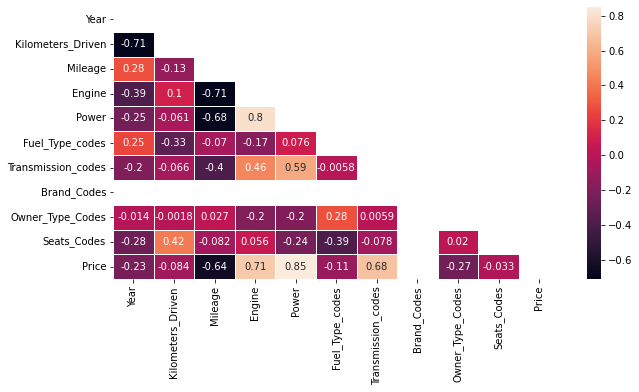

In [22]:
# будуємо матрицю кореляції
plt.figure(figsize=(10, 5))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

In [23]:
#виводимо показники кореляції по всім даним
df_cor=df_train.corr()

df_cor2=pd.DataFrame(
    {
        "Параметр":df_cor.index,
        "Price":df_cor['Price']
    }
).groupby('Параметр').first()

df_cor3=df_cor2.loc[df_cor2['Price'] < 1]

df_cor4=df_cor3.nlargest(9, 'Price')

df_cor4

,Price
Параметр,
Power,0.849137
Engine,0.710561
Transmission_codes,0.680731
Seats_Codes,-0.033071
Kilometers_Driven,-0.083951
Fuel_Type_codes,-0.110782
Year,-0.233769
Owner_Type_Codes,-0.265537
Mileage,-0.638404


In [24]:
# виводимо дані, що мають кореляцію по модулю >0.5
df_cor4 = df_cor4.abs() > 0.5
df_cor4

,Price
Параметр,
Power,True
Engine,True
Transmission_codes,True
Seats_Codes,False
Kilometers_Driven,False
Fuel_Type_codes,False
Year,False
Owner_Type_Codes,False
Mileage,True


**Висновок:**
- найбільш корелюючими значеннями є 4 з 10 : `Power`, `Engine`, `Transmission_codes` і `Mileage`
- цікаво, що `Mileage` має зворотню кореляцію

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [25]:
# Створюємо і одразу тренуємо модель
model = LinearRegression().fit(X_train, y_train)

# Робимо передбачення моделлю (train)
predictions_tr = model.predict(X_train)

# Рахуємо лосс (train)
loss_tr = mean_squared_error(y_train, predictions_tr, squared=False)
print('Loss (train):', loss_tr)

# Робимо передбачення моделлю (test)
predictions_te = model.predict(X_test)

# Рахуємо лосс (test)
loss_te = mean_squared_error(y_test, predictions_te, squared=False)
print('Loss (test):', loss_te)

Loss (train): 406980.07302450103
Loss (test): 328956.5223120837


No handles with labels found to put in legend.


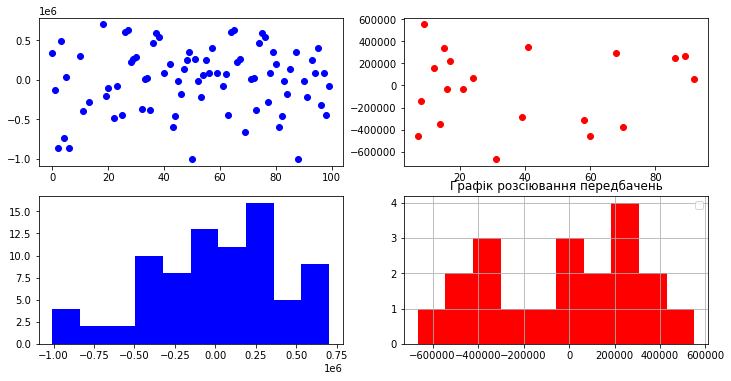

In [26]:
# Візуалізація результатів
errors_tr = y_train - predictions_tr
errors_te = y_test - predictions_te


plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
plt.plot(errors_tr,'o', color='blue', label='Errors (train)')

plt.subplot(2,2,2)
plt.plot(errors_te,'o', color='red', label='Errors (test)')

plt.subplot(2,2,3)
plt.hist(errors_tr, color='blue')

plt.subplot(2,2,4)
plt.hist(errors_te, color='red')

plt.title('Графік розсіювання передбачень')
plt.legend()
plt.grid(True)
plt.show()

**Висновок:**
судячи з графіків розсіювання бачимо, що вони не є нормально розподвленніми. Це говорить про те, що модель необхідно поліпшувати

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [27]:
#масштабуємо дані
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [28]:
# Створюємо і одразу тренуємо модель
model_s = LinearRegression().fit(X_train_s, y_train)

# Робимо передбачення моделлю (train)
predictions_tr_s = model_s.predict(X_train_s)

# Рахуємо лосс (train)
loss_tr_s = mean_squared_error(y_train, predictions_tr_s, squared=False)
print('Loss (train, scaler):', loss_tr_s)

# Робимо передбачення моделлю (test)
predictions_te_s = model_s.predict(X_test_s)

# Рахуємо лосс (test)
loss_te_s = mean_squared_error(y_test, predictions_te_s, squared=False)
print('Loss (test, scaler):', loss_te_s)

Loss (train, scaler): 406980.0730245044
Loss (test, scaler): 328956.5223120787


In [29]:
model_s.coef_, model_s.intercept_

(array([ -99896.36155009, -221835.38839589, -170040.14928553,
        -172510.00998139,  737269.66167682, -165991.21713765,
         259366.75603928,       0.        , -113172.01996292,
         160751.74755921]),
 1680000.000000004)

**Висновок:**
- отримавши коеф відмасштабованої моделі бачимо від"ємний, позитивний і нульовий вплив даних
- найбільш впливовим від"ємним значенням є `Kilometers_Driven`, що є логічним: при збільшенні пробігу знижується ціна на авто
- найбільш впливовим позитивним показником є `Power`, що є логічним: при збільшенні потужності двигуна зростає вартість авто

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [30]:
Y = y_train
X = X_train_s
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     42.42
Date:                Wed, 29 May 2024   Prob (F-statistic):           6.95e-25
Time:                        23:16:10   Log-Likelihood:                -1146.8
No. Observations:                  80   AIC:                             2314.
Df Residuals:                      70   BIC:                             2337.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   4.86e+04     34.537      0.0

**Висновок:**
Найбільш статзначущими є 
`Kilometers_Driven`, 
`Mileage`, 
`Power`, 
`Fuel_Type_codes`, 
`Transmission_codes`, 
`Owner_Type_Codes	`,
`Seats_Codes`

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [31]:
X_2 = X_train_s[:, [1, 2, 3, 4, 5, 6, 8, 9]]
X_2 = sm.add_constant(X_2)
model_2 = sm.OLS(Y,X_2)
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     47.16
Date:                Wed, 29 May 2024   Prob (F-statistic):           2.07e-25
Time:                        23:16:10   Log-Likelihood:                -1147.7
No. Observations:                  80   AIC:                             2313.
Df Residuals:                      71   BIC:                             2335.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   4.88e+04     34.404      0.0

**Висновок:**
Після вибірки у моделі лише статзначущих показників не побачили покращення показників моделі, навіть  є падіння результат на тисячні

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [32]:
X_3 = X_train_s[:, [0, 1, 2, 3, 4, 5, 6, 8, 9]]
X_3 = sm.add_constant(X_3)
model_3 = sm.OLS(Y,X_3)
results_3 = model_3.fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     42.42
Date:                Wed, 29 May 2024   Prob (F-statistic):           6.95e-25
Time:                        23:16:10   Log-Likelihood:                -1146.8
No. Observations:                  80   AIC:                             2314.
Df Residuals:                      70   BIC:                             2337.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   4.86e+04     34.537      0.0

**Висновок:**
На мою думку найкращі результати ми отримали в завданні 9, тому цю модель я б використовувала для подальшої роботи